## tensorflow を使った回帰分析

## パッケージのインポート

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## tensorflow を使った変数の定義

In [3]:
x = tf.placeholder(tf.float32, [None, 5])
a = tf.Variable(tf.zeros([5,1]))

y = tf.matmul(x, a)

t = tf.placeholder(tf.float32, [None,1])

loss = tf.reduce_sum(tf.square(y-t))

## 最適化関数の選択

In [4]:
train_step = tf.train.AdamOptimizer().minimize(loss)

## 学習データの作成

In [5]:
train_t = np.array([3.1, -0.8, 4.2, 9.9, 17.3, 24.2,
                    29.0, 35.2, 32.0, 18.6, 9.1, 4.6])
train_t = train_t.reshape([12,1])

train_x = np.zeros([12,5])

for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0,5)):
        train_x[row][col] = month**n
        
        
print('train_t:\n',train_t)       
print('train_x:\n',train_x)

train_t:
 [[ 3.1]
 [-0.8]
 [ 4.2]
 [ 9.9]
 [17.3]
 [24.2]
 [29. ]
 [35.2]
 [32. ]
 [18.6]
 [ 9.1]
 [ 4.6]]
train_x:
 [[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04]
 [1.0000e+00 1.1000e+01 1.2100e+02 1.3310e+03 1.4641e+04]
 [1.0000e+00 1.2000e+01 1.4400e+02 1.7280e+03 2.0736e+04]]


## セッションの呼び出しと変数の初期化

In [6]:
sess = tf.Session()
#sess.run(tf.initialize_all_variables()) ⇒ 2017年からtf.global_variables_initializer()に変更
sess.run(tf.global_variables_initializer())

## 学習の開始

In [7]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i %  10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print('Step: %d, Loss: %f' % (i, loss_val))
        
        a_val = sess.run(a)
        print(a_val) 
        
        #fig = plt.figure()
        #subplot = fig.add_subplot(1,1,1)
        #subplot.set_xlim(1,12)
        #subplot.scatter(range(1,13), train_t)
        #linex = np.linspace(1,12,100)
        #liney = predict(linex)
        #subplot.plot(linex, liney)

Step: 10000, Loss: 180.549561
[[-2.5597787 ]
 [ 0.7201538 ]
 [ 0.95759755]
 [-0.03755801]
 [-0.0038284 ]]
Step: 20000, Loss: 168.803589
[[-3.1238780e+00]
 [ 6.2240969e-02]
 [ 1.3812853e+00]
 [-1.0155881e-01]
 [-9.9561037e-04]]
Step: 30000, Loss: 160.811188
[[-2.3590856e+00]
 [-8.7755007e-01]
 [ 1.6850070e+00]
 [-1.3718306e-01]
 [ 3.6842073e-04]]
Step: 40000, Loss: 153.514984
[[-1.4773459e+00]
 [-1.8164001e+00]
 [ 1.9655617e+00]
 [-1.6852076e-01]
 [ 1.5354226e-03]]
Step: 50000, Loss: 146.775879
[[-6.0992002e-01]
 [-2.7265007e+00]
 [ 2.2350559e+00]
 [-1.9844542e-01]
 [ 2.6410152e-03]]
Step: 60000, Loss: 140.451935
[[ 0.22693078]
 [-3.6030073 ]
 [ 2.494343  ]
 [-0.22720207]
 [ 0.00371584]]
Step: 70000, Loss: 134.630920
[[ 1.0326914 ]
 [-4.4468455 ]
 [ 2.7439342 ]
 [-0.2548911 ]
 [ 0.00474216]]
Step: 80000, Loss: 129.243195
[[ 1.8089057 ]
 [-5.259737  ]
 [ 2.9843671 ]
 [-0.28156567]
 [ 0.00572929]]
Step: 90000, Loss: 124.231590
[[ 2.5573537 ]
 [-6.043531  ]
 [ 3.2161977 ]
 [-0.30728146]
 [

## 学習結果のプロット

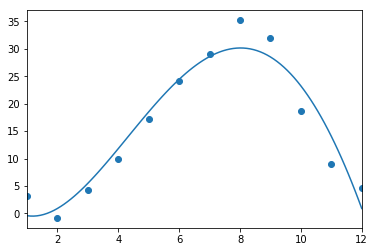

In [8]:
def predict(x):
    result = 0.0
    for n in range(0,5):
        result += a_val[n][0] * x**n
    return result

fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)